In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 0, 1, 1], [1, 0, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 1, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 1, 1, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.44996 stdev: 0.13127
Best fitness: 0.76871 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.159
Mean genetic distance 2.933, standard deviation 0.449
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 12.990 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53241 stdev: 0.14090
Best fitness: 0.76871 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.241
Mean genetic distance 2.991, standard deviation 0.433
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 23.390 sec (18.190 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59180 stdev: 0.12811
Best fitness: 0.76871 - size: (2, 13) - species 27 - id 53
Average adjusted fitness: 0.278
Mean genetic distance 2.986, standard deviation 0.441
Population of 204 members in 35 species
Total extinct

Population's average fitness: 0.65922 stdev: 0.11058
Best fitness: 0.77304 - size: (7, 24) - species 46 - id 2673
Average adjusted fitness: 0.358
Mean genetic distance 3.157, standard deviation 0.497
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 48.944 sec (31.307 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65433 stdev: 0.11577
Best fitness: 0.77304 - size: (7, 24) - species 46 - id 2673
Average adjusted fitness: 0.352
Mean genetic distance 3.174, standard deviation 0.500
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 41.366 sec (33.124 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65496 stdev: 0.11665
Best fitness: 0.77304 - size: (7, 24) - species 46 - id 2673
Average adjusted fitness: 0.377
Mean genetic distance 3.169, standard deviation 0.504
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 38.449 sec (34.434 average)

 

Population's average fitness: 0.63770 stdev: 0.13643
Best fitness: 0.79530 - size: (6, 21) - species 52 - id 6770
Average adjusted fitness: 0.364
Mean genetic distance 3.216, standard deviation 0.551
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 41.644 sec (40.256 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66029 stdev: 0.11846
Best fitness: 0.79530 - size: (6, 21) - species 52 - id 6770
Average adjusted fitness: 0.356
Mean genetic distance 3.233, standard deviation 0.558
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 41.502 sec (40.526 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.64825 stdev: 0.13486
Best fitness: 0.79530 - size: (6, 21) - species 52 - id 6770
Average adjusted fitness: 0.345
Mean genetic distance 3.199, standard deviation 0.555
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 39.718 sec (40.638 average)

 

Population's average fitness: 0.66304 stdev: 0.12520
Best fitness: 0.81323 - size: (9, 24) - species 52 - id 10321
Average adjusted fitness: 0.363
Mean genetic distance 3.229, standard deviation 0.617
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 42.257 sec (42.217 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.64812 stdev: 0.14889
Best fitness: 0.81323 - size: (9, 24) - species 52 - id 10321
Average adjusted fitness: 0.345
Mean genetic distance 3.211, standard deviation 0.618
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 45.200 sec (42.453 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66232 stdev: 0.12838
Best fitness: 0.81323 - size: (9, 24) - species 52 - id 10321
Average adjusted fitness: 0.369
Mean genetic distance 3.205, standard deviation 0.591
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 50.436 sec (43.340 average)

Population's average fitness: 0.65490 stdev: 0.13737
Best fitness: 0.82251 - size: (12, 29) - species 52 - id 12908
Average adjusted fitness: 0.336
Mean genetic distance 3.165, standard deviation 0.588
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 37.726 sec (35.260 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.64515 stdev: 0.12894
Best fitness: 0.82251 - size: (12, 29) - species 52 - id 12908
Average adjusted fitness: 0.340
Mean genetic distance 3.145, standard deviation 0.634
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 36.535 sec (35.283 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.63426 stdev: 0.13404
Best fitness: 0.82251 - size: (12, 29) - species 52 - id 12908
Average adjusted fitness: 0.343
Mean genetic distance 3.154, standard deviation 0.632
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 36.780 sec (35.544 avera

Population's average fitness: 0.66302 stdev: 0.12930
Best fitness: 0.82375 - size: (6, 19) - species 58 - id 16682
Average adjusted fitness: 0.392
Mean genetic distance 3.007, standard deviation 0.547
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 43.343 sec (41.444 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.64909 stdev: 0.15155
Best fitness: 0.82375 - size: (6, 19) - species 58 - id 16682
Average adjusted fitness: 0.354
Mean genetic distance 3.034, standard deviation 0.581
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 42.399 sec (41.534 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.66778 stdev: 0.12917
Best fitness: 0.82375 - size: (6, 19) - species 58 - id 16682
Average adjusted fitness: 0.363
Mean genetic distance 3.042, standard deviation 0.592
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 42.544 sec (41.735 averag

Population's average fitness: 0.64710 stdev: 0.15705
Best fitness: 0.82931 - size: (22, 42) - species 68 - id 21307
Average adjusted fitness: 0.417
Mean genetic distance 2.904, standard deviation 0.506
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 41.157 sec (42.407 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.67641 stdev: 0.14107
Best fitness: 0.82931 - size: (22, 42) - species 68 - id 21307
Average adjusted fitness: 0.376
Mean genetic distance 2.915, standard deviation 0.512
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 41.914 sec (42.411 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65990 stdev: 0.13938
Best fitness: 0.82931 - size: (22, 42) - species 68 - id 21307
Average adjusted fitness: 0.358
Mean genetic distance 2.948, standard deviation 0.514
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 41.623 sec (42.313 ave

Population's average fitness: 0.64771 stdev: 0.09801
Best fitness: 0.81076 - size: (3, 16) - species 34 - id 1976
Average adjusted fitness: 0.247
Mean genetic distance 3.221, standard deviation 0.492
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 29.441 sec (28.529 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63703 stdev: 0.10841
Best fitness: 0.81076 - size: (3, 16) - species 34 - id 1976
Average adjusted fitness: 0.295
Mean genetic distance 3.229, standard deviation 0.495
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 28.801 sec (28.689 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64879 stdev: 0.09785
Best fitness: 0.81076 - size: (3, 16) - species 34 - id 1976
Average adjusted fitness: 0.282
Mean genetic distance 3.251, standard deviation 0.484
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 29.849 sec (28.894 average)

 

Population's average fitness: 0.64325 stdev: 0.09817
Best fitness: 0.82004 - size: (4, 18) - species 34 - id 3457
Average adjusted fitness: 0.286
Mean genetic distance 3.250, standard deviation 0.525
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 29.968 sec (30.499 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.65483 stdev: 0.09303
Best fitness: 0.82004 - size: (4, 18) - species 34 - id 3457
Average adjusted fitness: 0.317
Mean genetic distance 3.257, standard deviation 0.506
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 30.419 sec (30.541 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.64856 stdev: 0.09700
Best fitness: 0.82127 - size: (6, 22) - species 33 - id 6061
Average adjusted fitness: 0.251
Mean genetic distance 3.241, standard deviation 0.512
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 31.789 sec (30.686 average)

 

Population's average fitness: 0.64558 stdev: 0.09269
Best fitness: 0.82313 - size: (7, 22) - species 33 - id 9334
Average adjusted fitness: 0.251
Mean genetic distance 3.157, standard deviation 0.539
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 36.847 sec (34.107 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.64368 stdev: 0.09852
Best fitness: 0.82313 - size: (7, 22) - species 33 - id 9334
Average adjusted fitness: 0.294
Mean genetic distance 3.163, standard deviation 0.543
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 36.968 sec (34.441 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.64911 stdev: 0.09988
Best fitness: 0.82313 - size: (7, 22) - species 33 - id 9334
Average adjusted fitness: 0.323
Mean genetic distance 3.161, standard deviation 0.537
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 36.197 sec (34.731 average)

 

Population's average fitness: 0.66670 stdev: 0.10512
Best fitness: 0.83055 - size: (10, 27) - species 60 - id 12572
Average adjusted fitness: 0.279
Mean genetic distance 3.143, standard deviation 0.522
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 42.781 sec (41.613 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.66895 stdev: 0.09967
Best fitness: 0.83364 - size: (13, 36) - species 4 - id 13562
Average adjusted fitness: 0.271
Mean genetic distance 3.179, standard deviation 0.531
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 42.711 sec (41.718 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.67892 stdev: 0.09266
Best fitness: 0.83364 - size: (13, 36) - species 4 - id 13562
Average adjusted fitness: 0.283
Mean genetic distance 3.156, standard deviation 0.537
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 42.218 sec (41.833 average

Population's average fitness: 0.68920 stdev: 0.09232
Best fitness: 0.84539 - size: (8, 25) - species 60 - id 16274
Average adjusted fitness: 0.339
Mean genetic distance 2.999, standard deviation 0.553
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 41.295 sec (41.676 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.67393 stdev: 0.11207
Best fitness: 0.84539 - size: (8, 25) - species 60 - id 16274
Average adjusted fitness: 0.295
Mean genetic distance 2.979, standard deviation 0.586
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 40.756 sec (41.510 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.69403 stdev: 0.09748
Best fitness: 0.84539 - size: (8, 25) - species 60 - id 16274
Average adjusted fitness: 0.290
Mean genetic distance 2.969, standard deviation 0.638
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 40.522 sec (41.235 averag

Population's average fitness: 0.70565 stdev: 0.09321
Best fitness: 0.84910 - size: (15, 43) - species 75 - id 21027
Average adjusted fitness: 0.312
Mean genetic distance 2.896, standard deviation 0.530
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 44.046 sec (44.279 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.68345 stdev: 0.11113
Best fitness: 0.84910 - size: (15, 43) - species 75 - id 21027
Average adjusted fitness: 0.287
Mean genetic distance 2.949, standard deviation 0.520
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 45.009 sec (44.200 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.69451 stdev: 0.09991
Best fitness: 0.84910 - size: (15, 43) - species 75 - id 21027
Average adjusted fitness: 0.298
Mean genetic distance 2.930, standard deviation 0.525
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 44.502 sec (44.161 ave

Population's average fitness: 0.60910 stdev: 0.07352
Best fitness: 0.75634 - size: (3, 15) - species 21 - id 945
Average adjusted fitness: 0.200
Mean genetic distance 3.171, standard deviation 0.499
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 27.030 sec (25.977 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60418 stdev: 0.08059
Best fitness: 0.75634 - size: (3, 15) - species 21 - id 945
Average adjusted fitness: 0.203
Mean genetic distance 3.175, standard deviation 0.502
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 27.913 sec (26.372 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60804 stdev: 0.07753
Best fitness: 0.76129 - size: (5, 19) - species 24 - id 2106
Average adjusted fitness: 0.222
Mean genetic distance 3.182, standard deviation 0.489
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 29.006 sec (26.861 average)

 **

Population's average fitness: 0.61878 stdev: 0.09007
Best fitness: 0.77737 - size: (5, 21) - species 24 - id 4487
Average adjusted fitness: 0.243
Mean genetic distance 3.223, standard deviation 0.541
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 31.870 sec (31.537 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62026 stdev: 0.09462
Best fitness: 0.77737 - size: (5, 21) - species 24 - id 4487
Average adjusted fitness: 0.267
Mean genetic distance 3.244, standard deviation 0.541
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 30.837 sec (31.396 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.62536 stdev: 0.09117
Best fitness: 0.77737 - size: (5, 21) - species 24 - id 4487
Average adjusted fitness: 0.274
Mean genetic distance 3.238, standard deviation 0.547
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 32.580 sec (31.478 average)

 

Population's average fitness: 0.62946 stdev: 0.09724
Best fitness: 0.79097 - size: (4, 16) - species 39 - id 6619
Average adjusted fitness: 0.191
Mean genetic distance 3.143, standard deviation 0.538
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 32.538 sec (33.520 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62505 stdev: 0.10163
Best fitness: 0.79097 - size: (4, 16) - species 39 - id 6619
Average adjusted fitness: 0.300
Mean genetic distance 3.137, standard deviation 0.548
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 34.089 sec (33.619 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.64060 stdev: 0.09190
Best fitness: 0.79097 - size: (4, 16) - species 39 - id 6619
Average adjusted fitness: 0.169
Mean genetic distance 3.136, standard deviation 0.572
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 32.597 sec (33.269 average)

 

Population's average fitness: 0.65450 stdev: 0.10000
Best fitness: 0.80891 - size: (8, 25) - species 46 - id 12313
Average adjusted fitness: 0.334
Mean genetic distance 3.110, standard deviation 0.559
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 37.005 sec (35.720 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.64863 stdev: 0.10044
Best fitness: 0.80891 - size: (8, 25) - species 46 - id 12313
Average adjusted fitness: 0.234
Mean genetic distance 3.103, standard deviation 0.535
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 35.965 sec (35.864 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.66160 stdev: 0.09912
Best fitness: 0.81262 - size: (9, 24) - species 39 - id 13313
Average adjusted fitness: 0.336
Mean genetic distance 3.098, standard deviation 0.527
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 37.027 sec (36.042 average)

Population's average fitness: 0.65316 stdev: 0.11829
Best fitness: 0.81323 - size: (10, 26) - species 39 - id 15886
Average adjusted fitness: 0.389
Mean genetic distance 3.141, standard deviation 0.505
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 39.705 sec (40.138 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.66028 stdev: 0.10890
Best fitness: 0.81323 - size: (10, 26) - species 39 - id 15886
Average adjusted fitness: 0.243
Mean genetic distance 3.171, standard deviation 0.508
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 40.567 sec (40.188 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.65624 stdev: 0.11040
Best fitness: 0.81323 - size: (10, 26) - species 39 - id 15886
Average adjusted fitness: 0.292
Mean genetic distance 3.169, standard deviation 0.495
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 41.899 sec (40.285 ave

Population's average fitness: 0.66628 stdev: 0.10895
Best fitness: 0.81323 - size: (14, 36) - species 66 - id 20719
Average adjusted fitness: 0.203
Mean genetic distance 2.901, standard deviation 0.434
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 44.906 sec (44.550 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.68035 stdev: 0.11012
Best fitness: 0.81323 - size: (14, 36) - species 66 - id 20719
Average adjusted fitness: 0.362
Mean genetic distance 2.916, standard deviation 0.443
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 45.912 sec (44.850 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.66606 stdev: 0.11362
Best fitness: 0.81818 - size: (14, 37) - species 66 - id 21193
Average adjusted fitness: 0.270
Mean genetic distance 2.922, standard deviation 0.462
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 45.428 sec (45.014 ave

Population's average fitness: 0.57386 stdev: 0.09326
Best fitness: 0.76562 - size: (5, 20) - species 35 - id 1094
Average adjusted fitness: 0.285
Mean genetic distance 3.144, standard deviation 0.495
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 25.897 sec (24.530 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58303 stdev: 0.09622
Best fitness: 0.76994 - size: (5, 17) - species 23 - id 1243
Average adjusted fitness: 0.192
Mean genetic distance 3.143, standard deviation 0.510
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 26.754 sec (24.808 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59554 stdev: 0.09548
Best fitness: 0.78417 - size: (5, 20) - species 25 - id 1369
Average adjusted fitness: 0.291
Mean genetic distance 3.143, standard deviation 0.505
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 26.854 sec (25.035 average)

 **

Population's average fitness: 0.63335 stdev: 0.11476
Best fitness: 0.82251 - size: (3, 17) - species 7 - id 4245
Average adjusted fitness: 0.276
Mean genetic distance 3.320, standard deviation 0.557
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 31.146 sec (29.901 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61996 stdev: 0.11588
Best fitness: 0.82251 - size: (3, 17) - species 7 - id 4245
Average adjusted fitness: 0.231
Mean genetic distance 3.312, standard deviation 0.542
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 31.851 sec (30.264 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63641 stdev: 0.11100
Best fitness: 0.82251 - size: (3, 17) - species 7 - id 4245
Average adjusted fitness: 0.269
Mean genetic distance 3.290, standard deviation 0.544
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 32.967 sec (30.580 average)

 ***

Population's average fitness: 0.64066 stdev: 0.12546
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.270
Mean genetic distance 3.272, standard deviation 0.599
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 35.589 sec (34.393 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.63914 stdev: 0.11745
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.262
Mean genetic distance 3.281, standard deviation 0.602
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 34.387 sec (34.448 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63421 stdev: 0.12037
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.269
Mean genetic distance 3.268, standard deviation 0.588
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 35.104 sec (34.565 average)

 

Population's average fitness: 0.63256 stdev: 0.12948
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.234
Mean genetic distance 3.063, standard deviation 0.588
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 34.969 sec (36.270 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.64828 stdev: 0.12715
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.305
Mean genetic distance 3.073, standard deviation 0.566
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 35.316 sec (36.196 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.63169 stdev: 0.13369
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.362
Mean genetic distance 3.096, standard deviation 0.557
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 35.203 sec (36.039 average)

 

Population's average fitness: 0.63716 stdev: 0.12824
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.356
Mean genetic distance 2.884, standard deviation 0.548
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 39.474 sec (39.655 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.62938 stdev: 0.12756
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.266
Mean genetic distance 2.905, standard deviation 0.530
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 38.984 sec (39.577 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.65227 stdev: 0.12082
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.302
Mean genetic distance 2.931, standard deviation 0.532
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 40.485 sec (39.772 average)


Population's average fitness: 0.65557 stdev: 0.13764
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.382
Mean genetic distance 3.046, standard deviation 0.521
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 37.599 sec (37.171 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.64868 stdev: 0.13640
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.341
Mean genetic distance 3.011, standard deviation 0.529
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 36.942 sec (37.201 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.65768 stdev: 0.12966
Best fitness: 0.85529 - size: (7, 25) - species 33 - id 7706
Average adjusted fitness: 0.322
Mean genetic distance 3.017, standard deviation 0.549
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 36.657 sec (37.115 average)


In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5166666666666667

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  0  1  0  0  0  2  2  2]
 [ 2  9  1  0  1  3  5  0  0  1]
 [ 0 10 10  5  2  1  0 10  2  0]
 [ 0  0  3  1  0  0  1  0  1  0]
 [ 0  0  0  6 14  0  0  2  3  1]
 [ 0  0  0  0  1 13  0  0  1  0]
 [ 0  0  0  4  0  0 12  0  0  0]
 [ 0  0  2  1  2  0  0  5  6  0]
 [ 0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  1 14]]


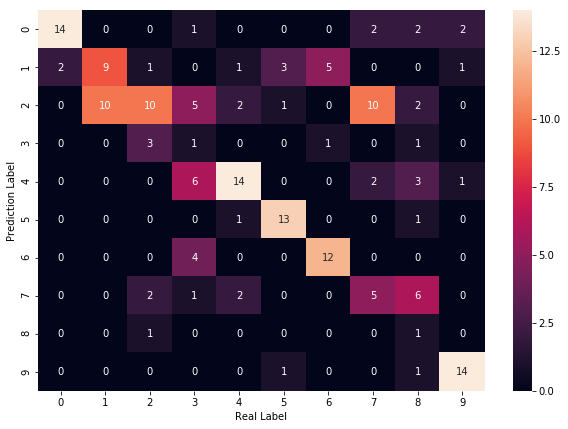

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[5] real:5
#1 min_error:0 index:[7] real:2
#2 min_error:0 index:[7] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[2] real:1
#5 min_error:0 index:[2] real:7
#6 min_error:0 index:[1] real:6
#7 min_error:0 index:[4] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[2] real:1
#10 min_error:0 index:[2] real:7
#11 min_error:0 index:[7] real:4
#12 min_error:1 index:[2 3 6 8] real:6
#13 min_error:0 index:[4] real:3
#14 min_error:0 index:[2] real:1
#15 min_error:0 index:[4] real:3
#16 min_error:0 index:[0] real:9
#17 min_error:0 index:[2] real:1
#18 min_error:0 index:[0] real:7
#19 min_error:0 index:[1] real:6
#20 min_error:0 index:[9] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[4] real:3
#23 min_error:0 index:[2] real:1
#24 min_error:0 index:[2] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[1] real:5
#27 min_error:0 index:[4] real:3
#28 min_error:0 index:[1] real:6
#29 min_error:0 index:[9] real:9
#30 min_error:

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5534941249226963
Avg Base Learner:0.8393630179344466


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.18888888888888888
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.3333333333333333


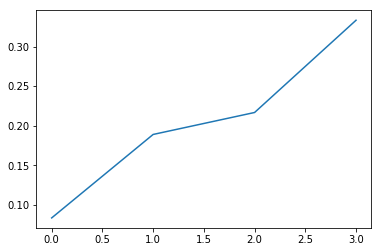

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.08333333333333333,
 0.18888888888888888,
 0.21666666666666667,
 0.3333333333333333]